# `SolverOptimizer`: Comparing Implicit/Explicit Time-Domain Integrators

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, SolverOptimizer
import numpy as np
import matplotlib.pyplot as plt

## Forward Euler Integrator

### Run 1 (Δt = 0.02): Unstable!

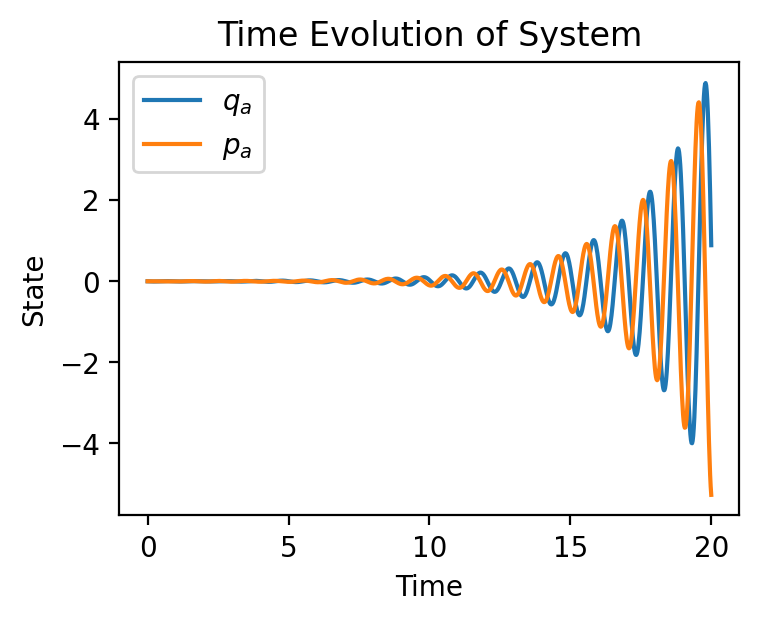

In [4]:
# pre optimization
omega_a = 2*np.pi*1
delta = 2*np.pi*0.2
A_in = lambda t: np.exp(1j * (omega_a + delta) * t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

### Run 2 (Δt = 0.002): Unstable, but better!

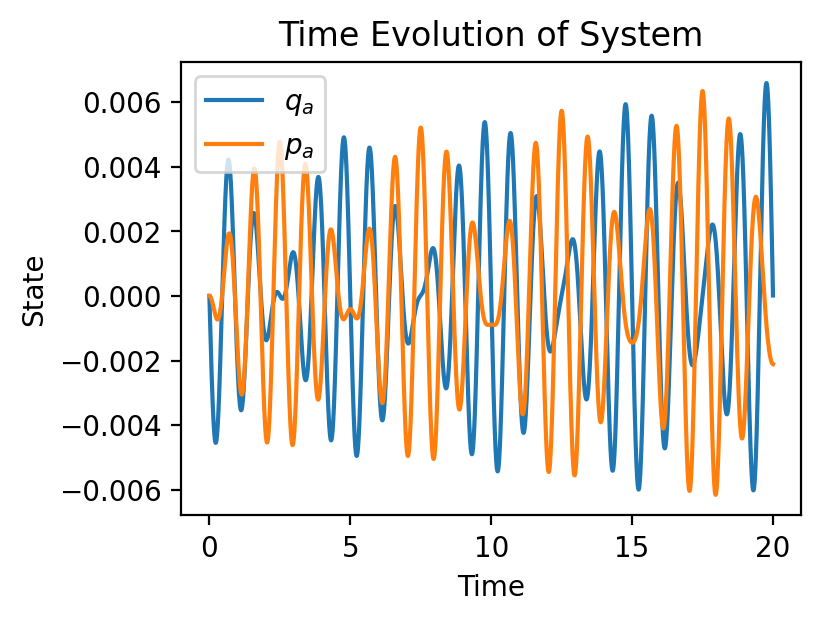

In [5]:
# pre optimization
omega_a = 2*np.pi*1
delta = 2*np.pi*0.2
A_in = lambda t: np.exp(1j * (omega_a + delta) * t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 10001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

### Run 3: (Δt = 0.0004): Stability Break-Even

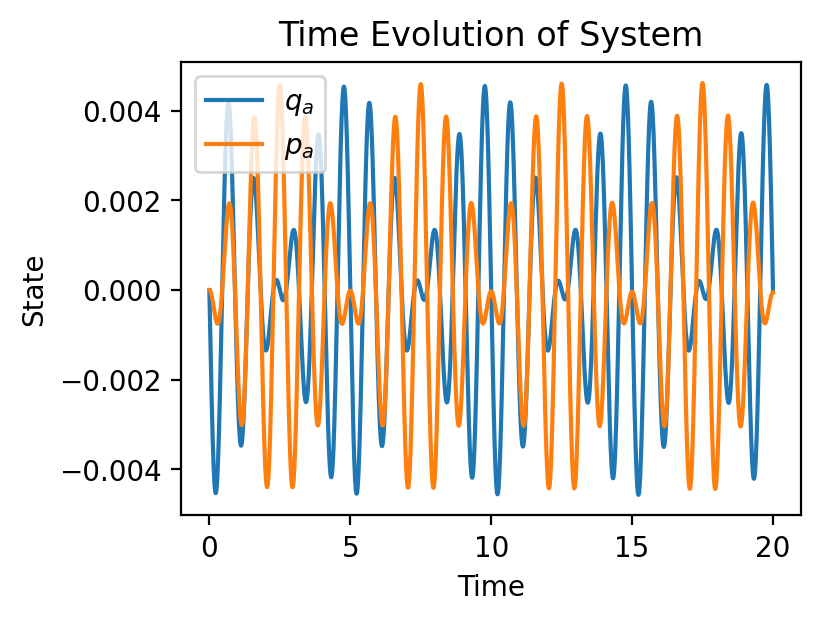

In [22]:
# pre optimization
omega_a = 2*np.pi*1
delta = 2*np.pi*0.2
A_in = lambda t: np.exp(1j * (omega_a + delta) * t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 50001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

### Run 4: Use `SolverOptimizer` to get within 1% error

In [23]:
opt = SolverOptimizer(sys, x_0, 0, 20)
dchi_2s, dts = opt.sweep_dt()

1000
2000
0.9747171393212214
4000
0.8104681079940463
8000
0.4961321974522251
16000
0.23762541406128088
32000
0.10855654974598405
64000
0.05098825676060675
128000
0.024600867131306613
256000
0.012043225354958092
512000
0.00595713303022759


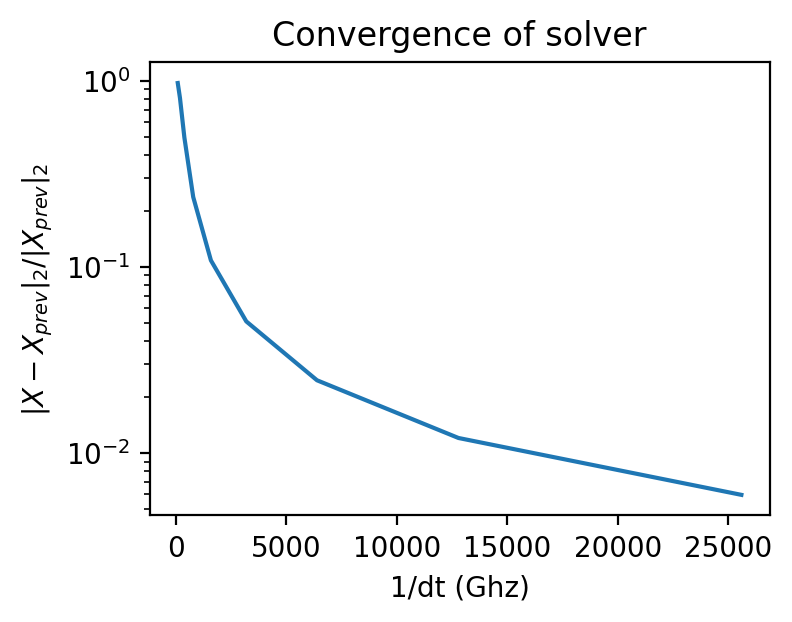

In [24]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.semilogy(1/dts, dchi_2s)
ax.set_xlabel("1/dt (Ghz)")
ax.set_ylabel("$\|X - X_{prev}\|_2/\|X_{prev}\|_2}$")
ax.set_title(f"Convergence of solver")
plt.show()

#### Calculate Reference Solution x_r(t) using `Δt_ref = 3.90625e-05` from optimizer

In [28]:
Δt_ref = dts[-1]

ts = np.linspace(0, 20, int(20/Δt_ref + 1))
X_r = sys.forward_euler(x_0, ts)

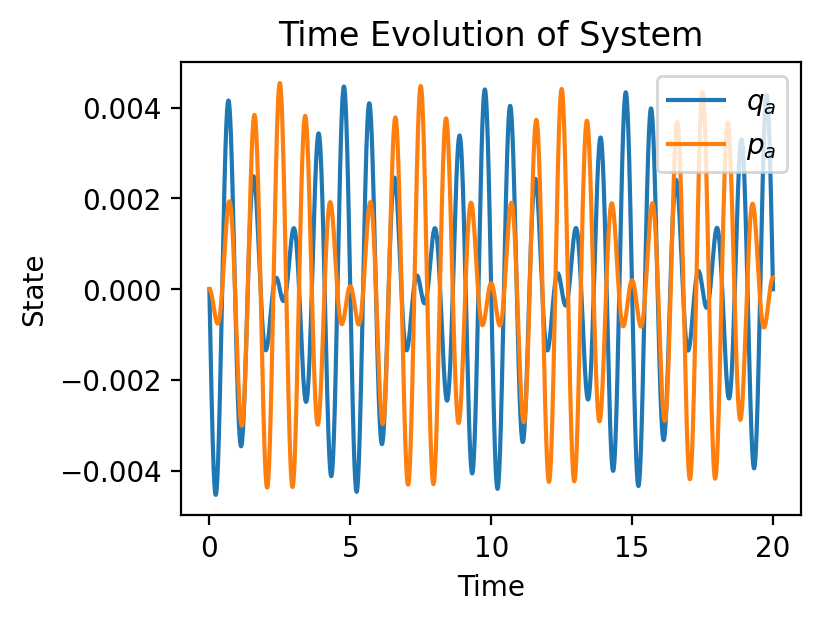

In [26]:
fig, ax = plot_full_evolution(X_r, ts, labels=["$q_a$","$p_a$"])
ax.legend()

# Estimated Error from Reference Solution

In [37]:
num_steps = np.array([1000*2**i for i in range(10)])
dts_err = 20/num_steps
dchi_2s_err = opt.sweep_dt_err(X_r, dts_err)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.27it/s]


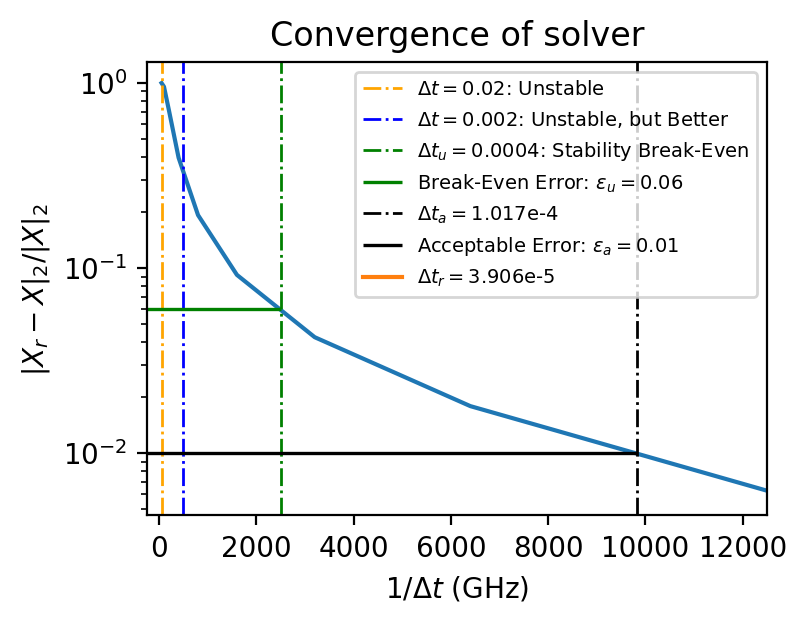

In [129]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.semilogy(1/dts_err[:-1], dchi_2s_err[:-1])
ax.set_xlabel(r"$1/\Delta t$ (GHz)")
ax.set_ylabel(r"$\|X_r - X\|_2/\|X\|_2}$")
ax.set_title(f"Convergence of solver")

Δt_err = 0.02
ax.axvline(x=1/Δt_err, color='orange', linestyle='-.', linewidth=1, label=r'$\Delta t = 0.02$: Unstable')

Δt_err = 0.002
ax.axvline(x=1/Δt_err, color='b', linestyle='-.', linewidth=1, label=r'$\Delta t = 0.002$: Unstable, but Better')

Δt_err = 0.0004
ax.axvline(x=1/Δt_err, color='green', linestyle='-.', linewidth=1, label=r'$\Delta t_u = 0.0004$: Stability Break-Even')

ε_u = 0.06
ax.hlines(y=ε_u, xmin=-250, xmax=1/Δt_err, linewidth=1.2, color='green', linestyle='-', label=r'Break-Even Error: $\varepsilon_u = 0.06$')


Δt_a = 1/9825
ax.axvline(x=1/Δt_a, color='k', linestyle='-.', linewidth=1, label=r'$\Delta t_a =$1.017e-4')
ε_a = 0.01
ax.hlines(y=ε_a, xmin=-250, xmax=1/Δt_a, linewidth=1.2, color='k', linestyle='-', label=r'Acceptable Error: $\varepsilon_a = 0.01$')
ax.plot([], [], label=r'$\Delta t_r =$3.906e-5')



plt.xlim(-250, 12500)
ax.legend(loc='best', fontsize=7)
plt.show()

In [124]:
Δt_ref

3.90625e-05

In [110]:
Δt_a

0.00010178117048346055